In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# refer to website

- 대륙별 관광객 수

In [2]:
def create_kto_data(yy, mm):
# 1. 불러올 엑셀 파일 경로 지정
    file_path = 'C:\\Users\\admin\\records\\kto_{}{}.xlsx'.format(yy, mm)
    
# 2. 엑셀 파일 불러오기
    df = pd.read_excel(file_path, header = 1, skipfooter = 4, usecols = 'A:J')
    
# 3. '기준년월' 컬럼 추가
    df['기준년월'] = '{}-{}'.format(yy, mm)
    
# 4. '국적' 컬럼에서 대륙 데이터 제거
    ignore_list = ['아시아주', '구주', '아프리카주', '미주', '대양주', '기타대륙', '교포소계']
    condition = (df['국적'].isin(ignore_list) == False) #대륙정보 미포함 조건
    df_country = df[condition].reset_index(drop = True) #대륙정보 제거
    
# 5. '대륙' 컬럼 추가
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙']*1 + ['교포']*1
    df_country['대륙'] = continents
    
# 6. 결과 출력
    return(df_country)

In [3]:
df = pd.DataFrame()  # 10년치 데이터 읽어오기
#데이터 통합하여 df에 담기
for yy in range(2010, 2020):
    for mm in range(1, 13):
        try:
            temp = create_kto_data(str(yy), str(mm).zfill(2)) 
            df = df.append(temp, ignore_index = True)
        except:
            pass

In [58]:
df

,국적,관광,상용,공용,유학/연수,기타,계,전년동기,성장률(%),구성비(%),기준년월,기준년,기준월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,237816,-12.0,36.7,2010-01,2010,01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,37425,-2.7,6.4,2010-01,2010,01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,25207,-42.3,2.6,2010-01,2010,01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,955,-42.0,0.1,2010-01,2010,01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,13947,27.7,3.1,2010-01,2010,01,아시아,75.1,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,대양주 기타,154,2,4,0,92,252,388,-35.1,0.0,2019-12,2019,12,오세아니아,61.1,0.0
7196,남아프리카공화국,665,3,0,3,251,922,853,8.1,0.1,2019-12,2019,12,아프리카,72.1,0.1
7197,아프리카 기타,1273,644,66,93,1002,3078,2706,13.7,0.2,2019-12,2019,12,아프리카,41.4,0.1
7198,국적미상,36,1,0,0,10,47,77,-39.0,0.0,2019-12,2019,12,기타대륙,76.6,0.0


# graph

In [4]:
d = df[df['대륙'] != '교포']  #교포 값이 없어서 제외.
d

KeyError: '대륙'

In [165]:
df1 = d.groupby(['기준년월', '대륙'])[['관광']].mean()  #교포값이 없는 데이터 프레임을 그룹바이, 대륙별로 관광객수만 뽑아서 평균
df1 = df1.reset_index()  # 기준년월과 대륙이 인덱스로 들어가게 되는데 그러면 그래프 사용 불가여서.
df1

,기준년월,대륙,관광
0,2010-01,기타대륙,10.000000
1,2010-01,아메리카,6613.400000
2,2010-01,아시아,13165.240000
3,2010-01,아프리카,281.500000
4,2010-01,오세아니아,3083.000000
...,...,...,...
715,2019-12,아메리카,15100.400000
716,2019-12,아시아,43790.720000
717,2019-12,아프리카,969.000000
718,2019-12,오세아니아,7189.000000


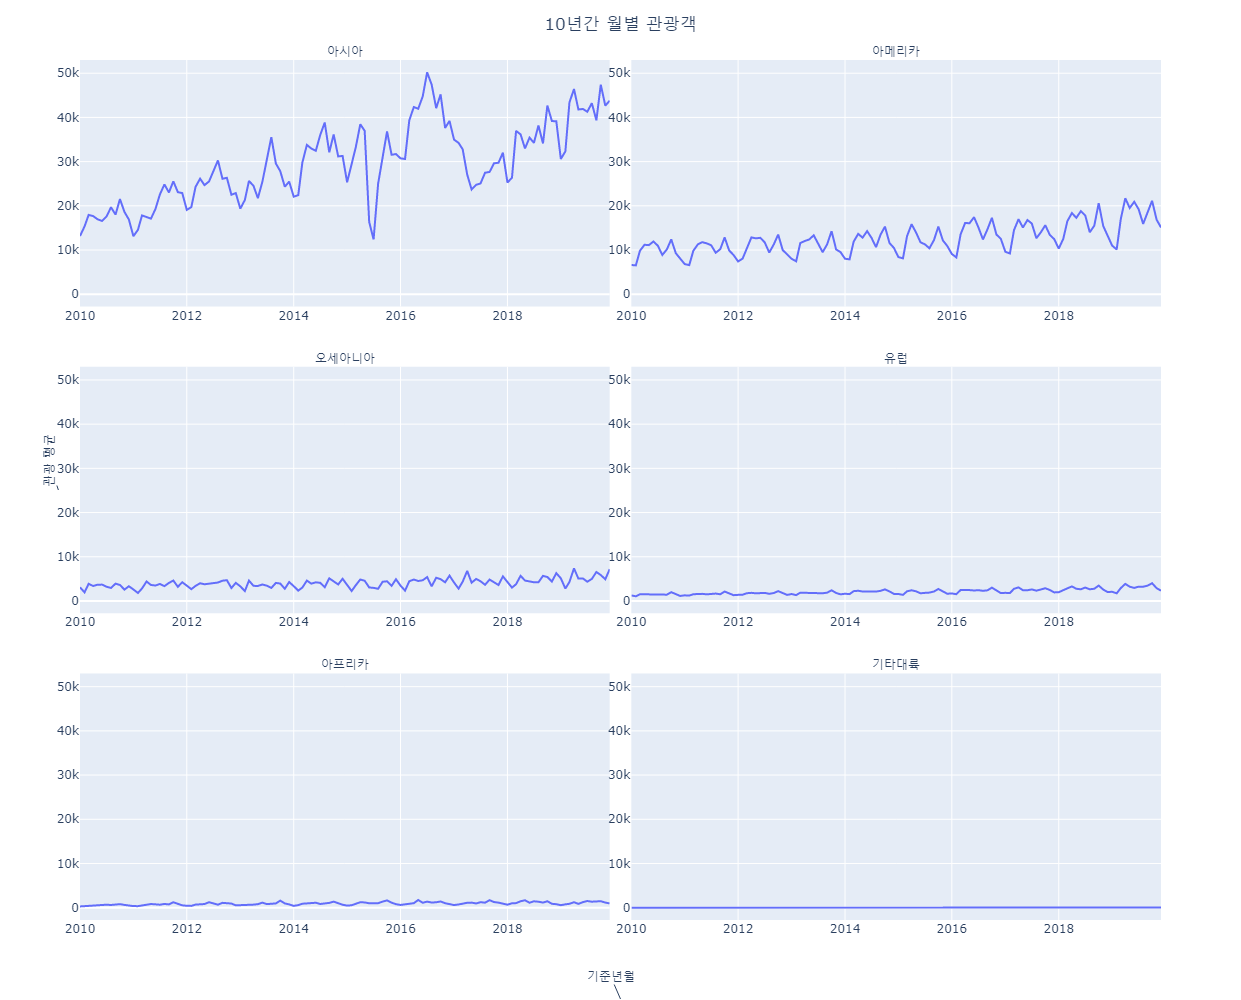

In [232]:

fig = px.line(df1, x = '기준년월', y = '관광', facet_col = '대륙',   #마우스 커서 두면 값 보이기
              facet_col_wrap = 2, height = 1000,
              category_orders = {'대륙': ['아시아', '아메리카', '오세아니아', '유럽', '아프리카', '기타대륙']})  #나오는 그래프 순서 바꾸기

fig.update_layout(title_text='10년간 월별 관광객', title_x=0.5)  #그래프 제목

fig.for_each_xaxis(lambda xaxis: xaxis.update(showticklabels=True))  #년도
fig.for_each_xaxis(lambda x: x.update(title = ''))
fig.add_annotation(x = 0.5, y = -0.1,     #관광평균 하나만 나오게
  text = "기준년월",
  xref = "paper", yref = "paper")

fig.for_each_yaxis(lambda yaxis: yaxis.update(showticklabels=True))   #기준년원 하나만 나오게
fig.for_each_yaxis(lambda y: y.update(title = ''))
fig.add_annotation(x = -0.02, y = 0.5,
  text = "관광 평균", textangle = -90,
  xref = "paper", yref = "paper")

fig.show()

In [ ]:
2015.7 가장 적은 이유 메르스
2016.7 엑스포 등등 관광산업을 살리기 위해 국가에서 노력했다고 함.